# Show behavior predictions for specific neural models

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import linear_model
import sys

from disp import set_plot

cc = np.concatenate

STRAINS = ['NM91', 'ZH23']
PTRAIN = .8
NSPLIT = 30

ALPHA = 10

FPS = 30.03

In [2]:
FSTRAIN = 'data/simple/strains.csv'

MSTRAINS = [(pd.read_csv(FSTRAIN)['STRAIN'] == strain) for strain in STRAINS]
MSTRAIN = np.any(MSTRAINS, axis=0)
ISTRAIN = MSTRAIN.nonzero()[0]

NTR = MSTRAIN.sum()
NTRAIN = int(round(PTRAIN*NTR))

# Population MA model predicting motion

In [9]:
TARG_BHV = 'MTN'
TWDW = 1
TARG = f'{TARG_BHV}_MN_{TWDW}'

LOAD_DIR = 'neur_basic'

NRL_MDLS = ['lnma', 'ma']
COLORS = ['m', 'k']

FLOADS = [
    f'data/simple/mlv/{LOAD_DIR}/baker_{nrl_mdl}_{"_".join(STRAINS).lower()}_{TARG_BHV.lower()}_ridge_alpha_{ALPHA}.npy'
    for nrl_mdl in NRL_MDLS
]

### Single trial

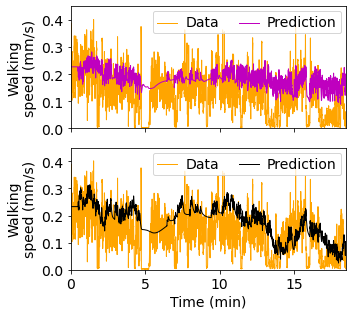

In [32]:
Y_LIM = (0, 0.45)

ISPLIT = 0
TEST_ITRS = [13]  # 0: 1, 3, 13, 15; 1: 2, 16; 2: 5, 13

fig, axs = plt.subplots(len(NRL_MDLS), 1, figsize=(5, 4.5), sharex=True, tight_layout=True)  #, squeeze=False)[:, 0]

for ax, nrl_mdl, color, fload in zip(axs, NRL_MDLS, COLORS, FLOADS):

    data = np.load(fload, allow_pickle=True)[0]

    for itr in TEST_ITRS:
        y = data['ys_test'][TARG][ISPLIT][itr]
        y_hat = data['y_hats_test'][TARG][ISPLIT][itr]
        t = np.arange(len(y))/FPS

        ax.plot(t/60, y, c='orange', lw=1)
        ax.plot(t/60, y_hat, c=color, lw=1)

    ax.legend(['Data', 'Prediction'], ncol=2)
    set_plot(ax, x_lim=(0, t[-1]/60), y_lim=Y_LIM, y_label=f'Walking\nspeed (mm/s)', font_size=14)
set_plot(axs[1], x_ticks=[0, 5, 10, 15], x_label='Time (min)', font_size=14)
    
fig.savefig('cosyne_2023/1c.svg')